In [10]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

<img src="wands-away.jpg" style="margin:auto" height="50%" width="50%"/>

## Fitting models to data

<img src="spreadsheet-fit.png" style="margin:auto" />

### Steps

+ Getting data into python
+ Performing fit
+ Plotting the fit
+ Analyzing the fit (quality, parameter estimates, etc.)

<img src="dataset-csv.png" style="margin:auto" />

#### We can read files using `pandas`

In [11]:
import pandas as pd
pd.read_csv("test-dataset.csv")

,time,obs
0,0.0,0.000
1,0.5,0.032
2,1.0,0.274
3,1.5,0.264
4,2.0,0.411
5,2.5,0.440
6,3.0,0.517
7,3.5,0.486
8,4.0,0.508
9,4.5,0.651


In [12]:
d = pd.read_csv("test-dataset.csv") # <- capture in variable d
type(d)

pandas.core.frame.DataFrame

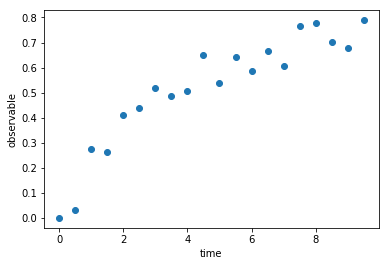

In [13]:
plt.plot(d.time,d.obs,"o")
plt.xlabel("time")
plt.ylabel("observable")

#### How can we fit a model to these data?

In [14]:
import scipy.stats

In [15]:
m, b, r_value, p_value, std_err = scipy.stats.linregress(d.time,d.obs)
print("slope:",m)
print("intercept:",b)
print("R squared:",r_value**2)

slope: 0.0696240601504
intercept: 0.186085714286
R squared: 0.824888079747


#### Plot it

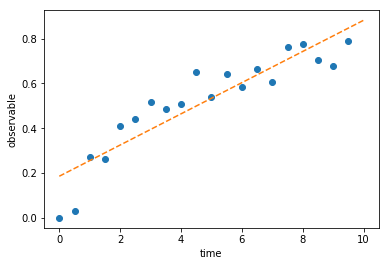

In [16]:
plt.plot(d.time,d.obs,"o")
plt.xlabel("time")
plt.ylabel("observable")

t_range = np.array([0,10]) 
plt.plot(t_range,t_range*m + b,"--")

#### Put together

slope: 0.0696240601504
intercept: 0.186085714286
R squared: 0.824888079747


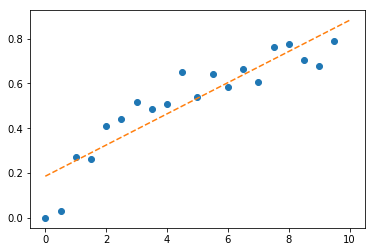

In [18]:
d = pd.read_csv("test-dataset.csv")
plt.plot(d.time,d.obs,"o")

m, b, r_value, p_value, std_err = scipy.stats.linregress(d.time,d.obs)
t_range = np.array([0,10]) 
plt.plot(t_range,t_range*m + b,"--")

print("slope:",m)
print("intercept:",b)
print("R squared:",r_value**2)

## What is actually going on in a fit???

#### Let's try fitting manually

In [19]:
def y_calc(x,m,b):
    return m*x + b

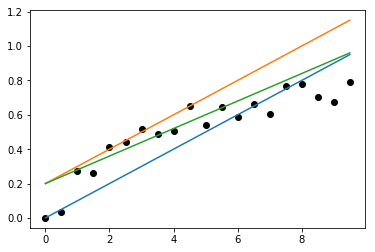

In [20]:
plt.plot(d.time,d.obs,"ko")
plt.plot(d.time,y_calc(d.time,m=0.1,b=0))
plt.plot(d.time,y_calc(d.time,m=0.1,b=0.2))
plt.plot(d.time,y_calc(d.time,m=0.08,b=0.2))


#### Implicitly minimizing a *residuals* function

In [21]:
def y_residuals(x_obs,y_obs,m,b):
    
    return (m*x_obs + b) - y_obs

In [22]:
def plot_figs(x_obs,y_obs,m,b,ax):
    """Convenience plotting function"""
    ax[0].plot(x_obs,y_obs,"ko")
    ax[0].plot(x_obs,y_calc(x_obs,m,b))
    ax[1].plot(x_obs,y_residuals(x_obs,y_obs,m,b))

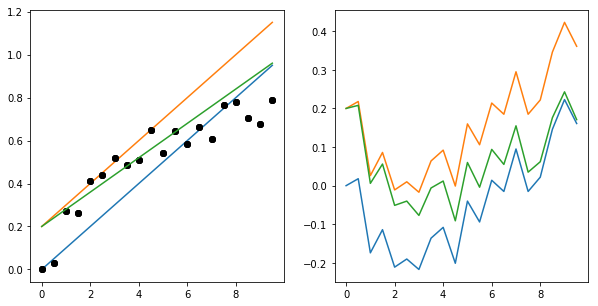

In [23]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

plot_figs(d.time,d.obs,m=0.1,b=0,ax=ax)
plot_figs(d.time,d.obs,m=0.1,b=0.2,ax=ax)
plot_figs(d.time,d.obs,m=0.08,b=0.2,ax=ax)


#### Software minimizes the sum of the squared residuals

$$ SSR = \sum_{i=0}^{i < N} (y_{calc,i} - y_{obs,i})^{2}$$

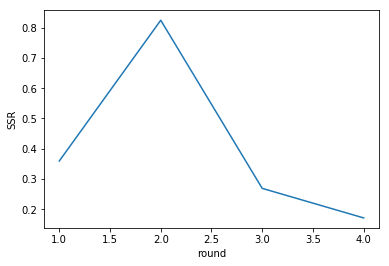

In [24]:

sum_squared_residuals = [np.sum(y_residuals(d.time,d.obs,m=0.10,b=0.0)**2),
                         np.sum(y_residuals(d.time,d.obs,m=0.10,b=0.2)**2),
                         np.sum(y_residuals(d.time,d.obs,m=0.08,b=0.2)**2),
                         np.sum(y_residuals(d.time,d.obs,m=0.0696240601504,b=0.186085714286)**2)]

plt.plot([1,2,3,4],sum_squared_residuals)
plt.xlabel("round")
plt.ylabel("SSR")

#### We use sum of squared residuals:
+ Penalizes big deviations a lot.
+ Penalizes both negative and positive deviations equally. 

+ Deep statistical reasons.  Minimizing SSR is a *maximum likelihood* calculation.  (If uncertainty for each point is identical, $SSR \propto -ln(L)$.)

#### Regression ingredients
+ Experimental data
+ Residuals function
+ Way to search through "parameter space"

#### Parameter space
<img src="param-space.png" style="margin:auto" />

### How do we search parameter space?

One example: Nelder-Mead

<img src="00_flip.png" style="margin:auto", height="65%" width="65%"/>

<img src="01_contract.png" style="margin:auto", height="65%" width="65%"/>

<img src="02_shrink.png" style="margin:auto", height="65%" width="65%"/>

In [21]:
%%HTML
<video width="650" height="600" controls="controls"> 
  <source src="./simplex.mp4" type="video/mp4">
</video>

### When does this fail?

+ If there is no minimum (or an infinitely long valley)
+ If there are multiple minima
+ If the function has infinities
+ When guesses are so bad you can't reach minimum

### Next class:

+ Implementing residual functions
+ `scipy.optimize.least_squares`

# Do
+ Choose the model that fits the data best with the fewest parameters
+ Check your residuals for randomness
+ Use a biologically/physically informed model with independently testable/interpretable parameters  

# Don't
+ Transform your data (e.g. take a log before fitting).  Most regression approaches assume measurement uncertainty is normally distributed. 
+ Try only one set of parameter guesses
+ Overfit your data (fit a model with more parameters than observations)

# Prep: Create a m/b SSR heat map

In [ ]:
m_list = np.linspace(-0.5, 0.5, 100)
b_list = np.linspace(-0.5, 0.5, 100)
M, B = np.meshgrid(m_list,b_list)

def ssr(x_obs,y_obs,m,b):
    
    out = np.zeros(m.shape)    
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            out[i,j] = np.sum(((m[i,j]*x_obs + b[i,j]) - y_obs)**2)
    
    return out

Z = ssr(d.time,d.obs,M,B)

plt.figure(figsize=(8,8))
cp = plt.contourf(M, B, Z,20,cmap="terrain")
plt.axis("equal")
plt.xlabel("m")
plt.ylabel("b")

plt.plot((0.0696240601504),(0.186085714286),"y+",ms=20)

plt.savefig("param-space.png")